# Support Vector Machine

#### 선형, 비선형 분류(linear, non-linear classification), 회귀(regression), 이상치(Outlier) 탐색 등 복잡한 분류문제에 적절한 다목적 기계학습 모델 


## 작동원리 

#### 분류를 위한 최적의 결정경계(decision boundary) 즉, 다수의 결정경계 후보들 중에서 최대의 마진을 갖는 결정경계를 찾음

---

## SVM 클래스(numpy로 직접 구현한 것)

In [1]:
import numpy as np

class SVM:
    def __init__(self, X, y, epochs, lr, C):
        self.X = X; self.y = y; self.epochs = epochs
        self.lr = lr; self.C = C

        # Add column vector of ones for computational convenience
        self.X = np.column_stack((np.ones(len(X)), X))

        # Initialize normal vector
        self.w = np.ones(len(self.X[0]))

    def distances(self, w, with_lagrange=True):
        distances = self.y * (np.dot(self.X, w)) - 1

        # get distance from the current decision boundary
        # by considering 1 width of margin

        if with_lagrange: # if lagrange multiplier considered
            # if distance is more than 0, sample is not on the support vector
            # Lagrange multiplier will be 0
            distances[distances > 0] = 0
        return distances

    def get_cost_grads(self, X, w, y):
        distances = self.distances(w)
        
        # Get current cost
        L = 1 / 2 * np.dot(w, w) - self.C * np.sum(distances)
        dw = np.zeros(len(w))

        for ind, d in enumerate(distances):
            if d == 0: # if sample is not on the support vector
                di = w # (alpha * y[ind] * X[ind]) = 0
            else:
                # (alpha * y[ind] * X[ind]) = y[ind] * X[ind]
                di = w - (self.C * y[ind] * X[ind])
            dw += di
        return L, dw / len(X)
    
    def fit(self):
        for i in range(self.epochs):
            L, dw = self.get_cost_grads(self.X, self.w, self.y)
            self.w = self.w - self.lr * dw

    def predict(self, X):
        X = np.column_stack((np.ones(len(X)), X))
        return np.sign(X @ self.w) # X @ self.w => X.dot(self.w)

---

## Soft margin Classification

#### 이상치(outlier)가 있는 경우에 민감한 하드 마진 분류의 문제점을 피하기 위한 것

### sklearn.svm.SVC
#### SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr’, break_ties=False, random_state=None)

### 주요 파라메터 
#### - kernel: 커널 유형 지정  {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
#### - C: 오류허용 정도의 역수 {작을수록 오류를 많이 허용(이상치에 덜 민감함)}
#### - gamma: Kernel 계수 {for ‘rbf’, ‘poly’, ‘sigmoid’}

accuracy: 1.0


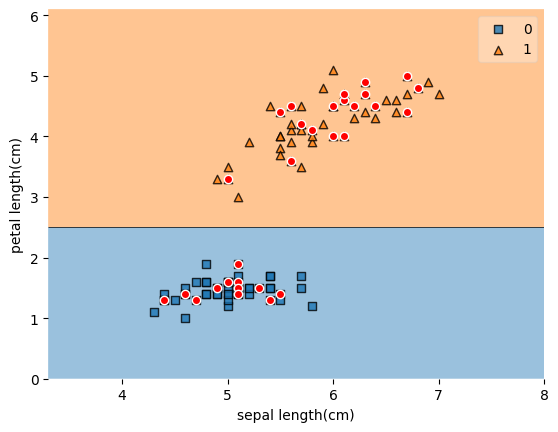

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris["data"][0:100, (0,2)] # 처음 100개의 데이터 중에서 꽃받침 길이, 꽃잎 길이
y = iris["target"][0:100] # 처음 50개는 Iris-setosa, 다음 50개는 Iris-versicolor
y = np.where(y==0, 0, 1) # 만일 Iris-setosa이면 0, 아니면 1로 변경

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = SVC(kernel='linear', C=0.5)   # kernel 유형 linear(선형 분류) 지정, rbf가 default
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

plot_decision_regions(X, y, clf=clf)
plt.scatter(X_test[:,0], X_test[:,1], marker="o", color="r", edgecolor="w")
plt.xlabel('sepal length(cm)')
plt.ylabel('petal length(cm)')
plt.show()

---

## 비선형 SVM

### 데이터 준비 

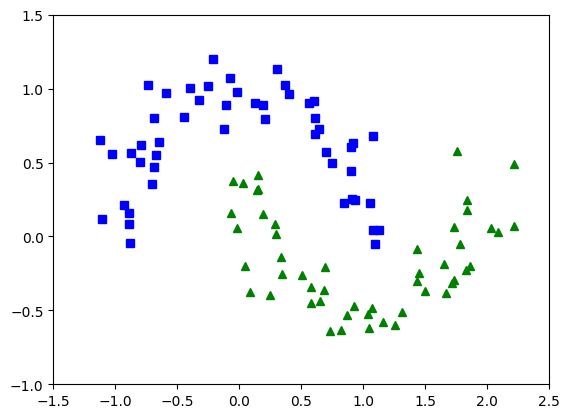

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)

plt.plot(X[:,0][y==0], X[:,1][y==0], "bs")
plt.plot(X[:,0][y==1], X[:,1][y==1], "g^")
plt.axis([-1.5, 2.5, -1.0, 1.5])
plt.show()

### StandardScaler로 분류 

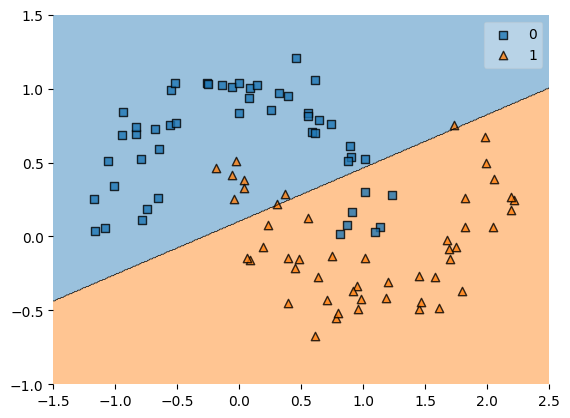

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline  
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)  # make_moons 달 모양으로 비선형 그래프 생성
svm_clf = make_pipeline(                      # 일련의 동작을 배치처리하는 pipeline
    StandardScaler(),
    SVC(kernel='linear', C=10))

svm_clf.fit(X, y)

plot_decision_regions(X, y, clf=svm_clf)
plt.axis([-1.5, 2.5, -1.0, 1.5])
plt.show()

---

## PolynomialFeatures

#### 각 특성을 주어진 degree에 따라 제곱하여 새로운 특성으로 추가

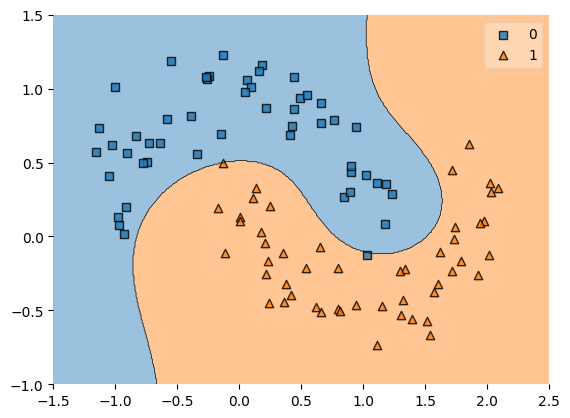

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)
svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),   # degree에 따라 제곱하여 새로운 특성 추가 
    StandardScaler(),
    SVC(kernel='linear', C=10))  # 선형 분류 

svm_clf.fit(X, y)

plot_decision_regions(X, y, clf=svm_clf)
plt.axis([-1.5, 2.5, -1.0, 1.5])
plt.show()

---

## 다항식 커널(kernel=‘poly’)

#### 커널 트릭을 사용해 높은 차수의 특성을 추가한 것과 같은 효과를 가지면서도 실제로 특성을 추가하지 않음으로 모델이 느려지는 것을 방지할 수 있다. 


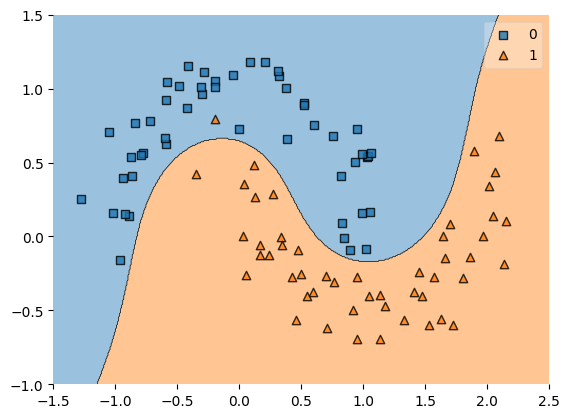

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)
svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=3, coef0=1, C=5))  # 오차를 줄일순 있으나 모델이 매우 느려짐 
svm_clf.fit(X, y)

plot_decision_regions(X, y, clf=svm_clf)
plt.axis([-1.5, 2.5, -1.0, 1.5])
plt.show()

---

## 가우시안 RBF 커널(kernel=‘rbf’)

#### 기존 벡터 𝜇와 입력벡터 𝑥의 유사도(similarity)를 측정하는 함수
#### 각 샘플이 특정 randmark와 얼마나 유사한지 계산한 값을 추가한다. 

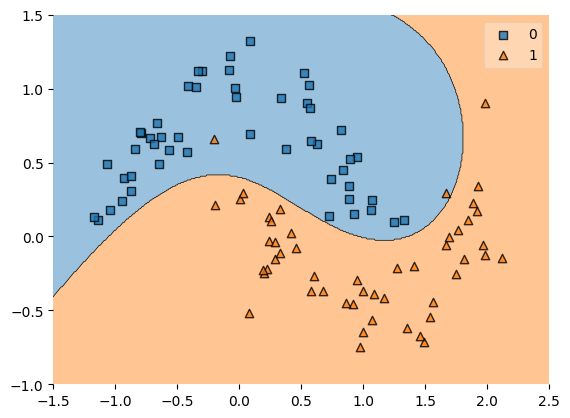

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)
svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', gamma=0.1, C=100))
svm_clf.fit(X, y)

plot_decision_regions(X, y, clf=svm_clf)
plt.axis([-1.5, 2.5, -1.0, 1.5])
plt.show()